# Tutorial: Deriving Evalution Workflows

Objective:

> Learning how evaluation workflows are derived from the main ML pipeline.

Principles:

1. ML metric is a measure to assess the performance of an ML solution.
2. *Development evaluation* (of the logical model - a.k.a. the solution) is derived from both the _train mode_ and _apply mode_ workflows combined according to a selected *backtesting method*.
3. Workflow for evaluating an already trained (physical) model is composed simply from the model predictions and the (eventually observed) true outcomes.

## Development Evaluation
* Essential feedback during the model development process defined as a **function of true and predicted outcomes**.
* Indicating a relative change in the solution quality induced by the particular change in its implementation (code).
* Working with historical data with known outcomes arranged using a particular **evaluation method**.

### Holdout Method

Evaluation method based on part of a training dataset being withheld for testing the predictions.

In [17]:
from sklearn import metrics
from forml import evaluation, project

EVALUATION = project.Evaluation(
    evaluation.Function(metrics.log_loss), # LogLoss metric function
    evaluation.HoldOut(                    # HoldOut evaluation method
        test_size=0.2, stratify=True, random_state=42
    ),
)

Based on the known `SOURCE` and `PIPELINE` components, ForML can produce a task graph to evaluate that solution using the provided definition:

In [18]:
from forml.pipeline import payload, wrap
from dummycatalog import Foo
with wrap.importer():
    from sklearn.linear_model import LogisticRegression

SOURCE = project.Source.query(Foo.select(Foo.Value), Foo.Label)
PIPELINE = LogisticRegression(random_state=42)

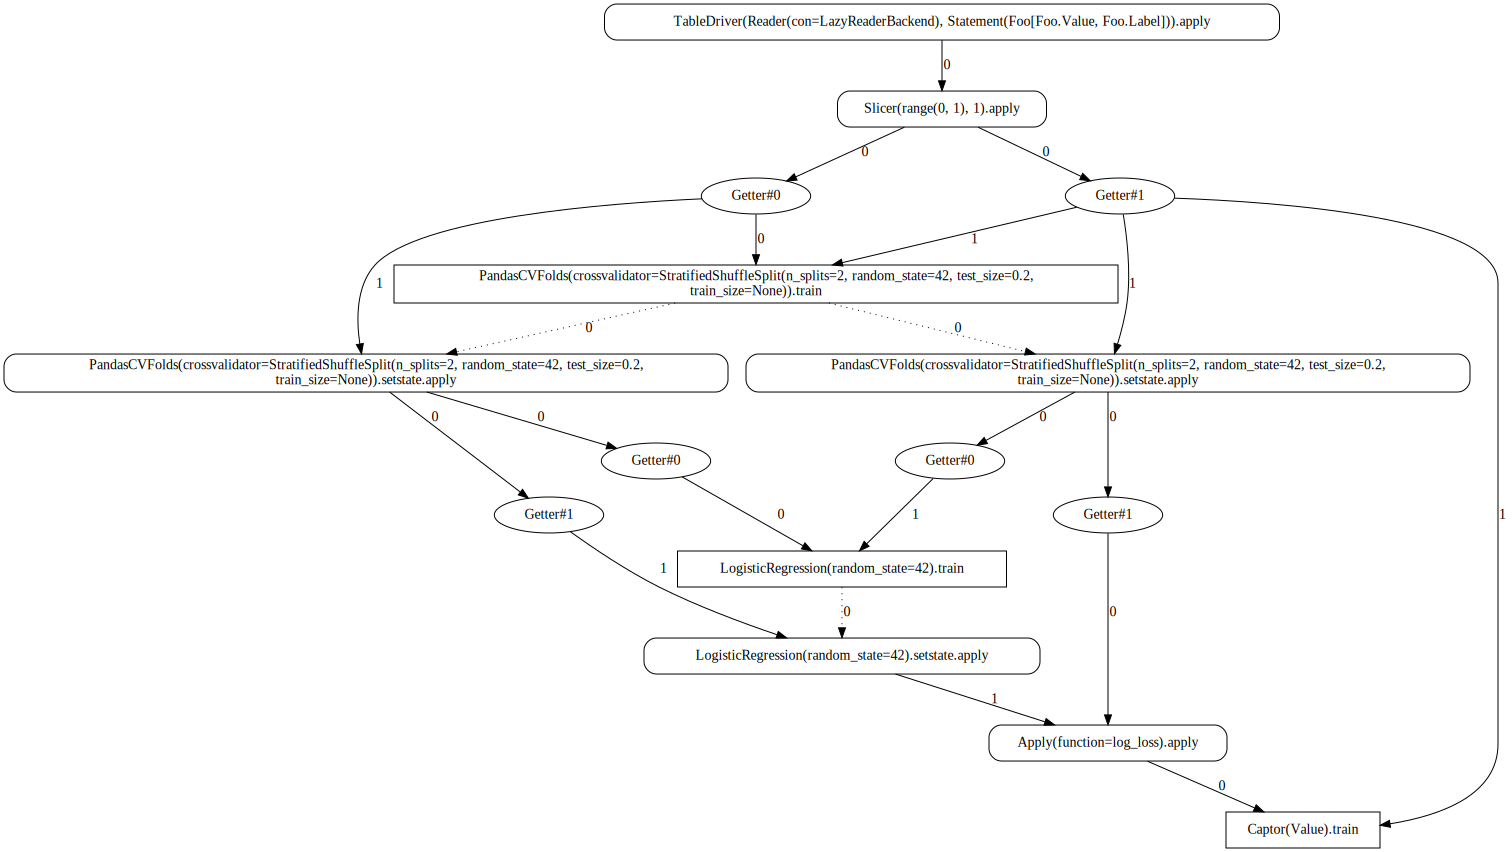

In [19]:
SOURCE.bind(PIPELINE, evaluation=EVALUATION).launcher(
    runner="graphviz"
).eval()

### Cross-validation Method
Evaluation method based on a number of independent train-test trials using different parts of the same training dataset.

In [20]:
from sklearn import model_selection

EVALUATION = project.Evaluation(
    evaluation.Function(metrics.log_loss),  # LogLoss metric function
    evaluation.CrossVal(                    # CrossValidation method
        crossvalidator=model_selection.StratifiedKFold(
            n_splits=3, shuffle=True, random_state=42
        )
    ),
)

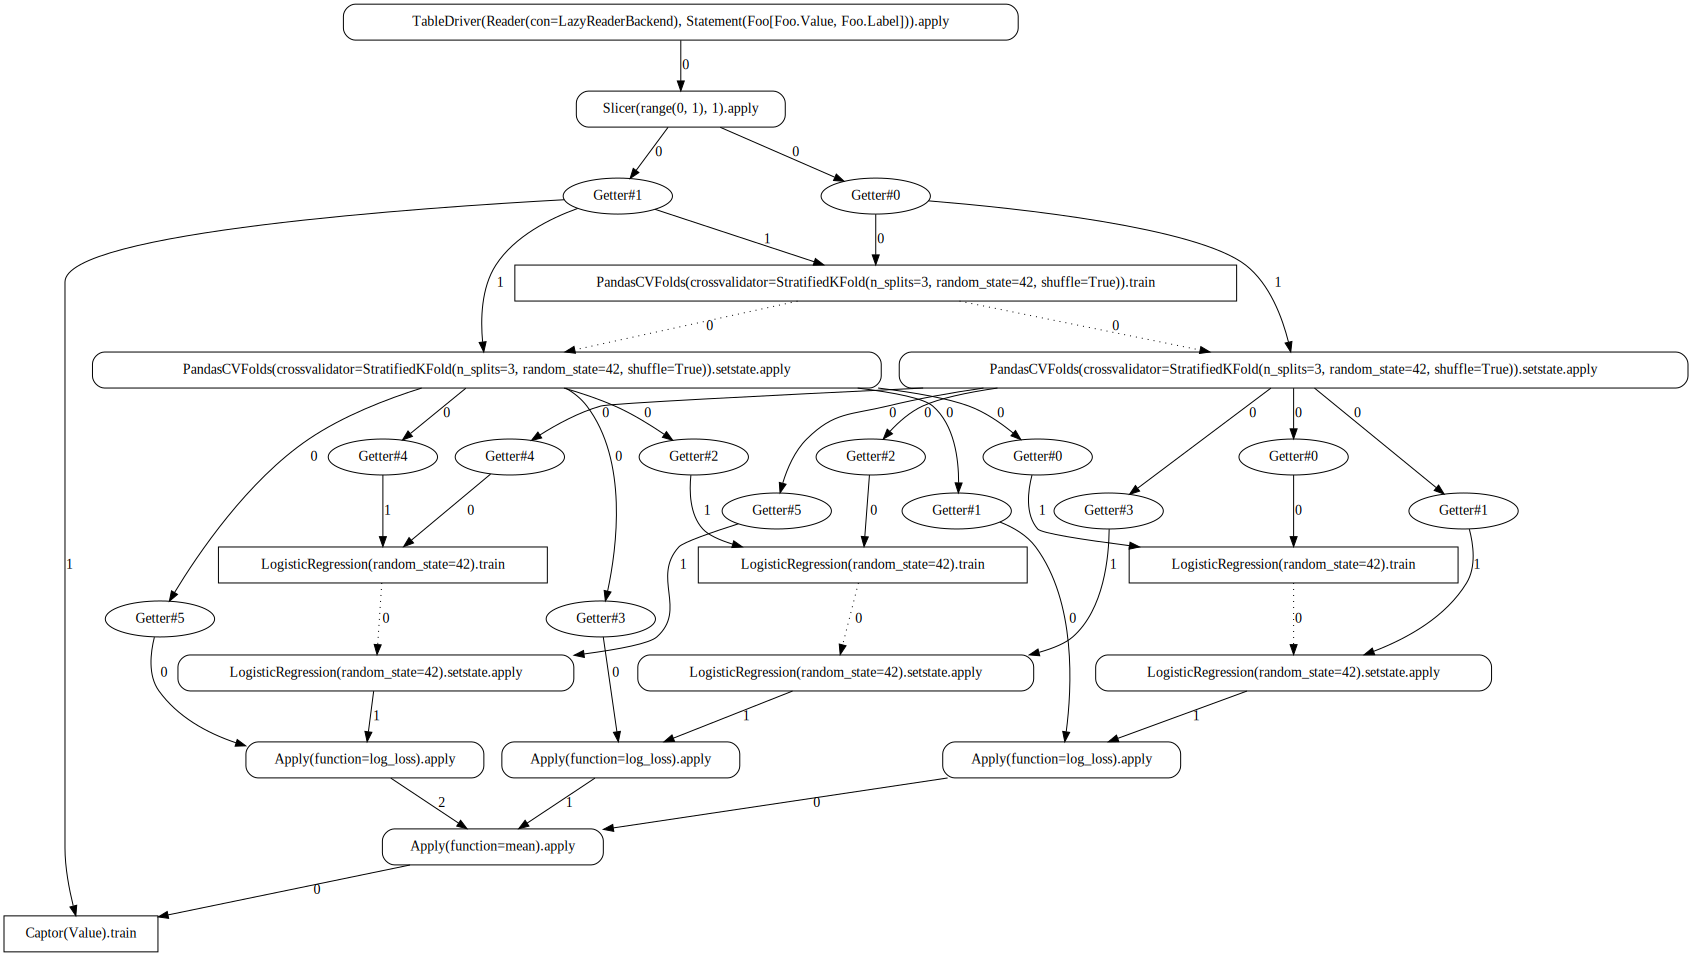

In [21]:
SOURCE.bind(PIPELINE, evaluation=EVALUATION).launcher(
    runner="graphviz"
).eval()

## Production Performance Tracking

* Evaluating performance of a physical (trained) model typically making true _future predictions_.
* Critical for operational monitoring.
* The concept of evaluation methods doesn't apply here.
* Depends on a presence of a _feedback loop_ eventually delivering the eventual true outcomes.

This will be demonstrated later in scope of the final solution of [Avazu CTR Prediction](../3-solution).